In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt

from os import listdir, makedirs
import os

import glob

from keras import layers
from keras import models
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras import optimizers, regularizers

Using TensorFlow backend.


In [2]:
resolution = 150
batch_size = 128
learning_rate = [0.001,0.01,0.1]
epochs = [10,50,100]
history_set = {}

### CNN

In [17]:
def plotar(history,epochs,eta):
    print('Epochs: {} | Learning rate: {}'.format(epochs,eta))
    
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend(loc='best')

    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend(loc='best')
    plt.show()

In [4]:
def create_model(train_gen, val_gen, learning_rate, num_epochs, batch_size):
    model = Sequential()
    model.add(layers.Conv2D(filters=100, kernel_size=(5,5), strides=(1,1), input_shape=(resolution,resolution,3)))
    model.add(layers.Conv2D(filters=100, kernel_size=(5,5)))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(units= 64, activation='relu'))
    model.add(layers.Dense(units=10, activation='relu'))
    
    model.summary()
    
    n_train = train_gen.n
    n_valid = val_gen.n
    
    model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adamax(lr=learning_rate), metrics=['acc'])
    history = model.fit_generator(
        train_generator,
        steps_per_epoch=n_train//batch_size,
        epochs=num_epochs,
        validation_data=val_generator,
        validation_steps=n_valid//batch_size
    )
    
    history_set[(num_epochs,learning_rate)] = history

### Item a)
Total params: 32,520,814

### Item b)

In [5]:
top10 = {'homer_simpson': 0,
'ned_flanders': 1,
'moe_szyslak': 2,
'lisa_simpson': 3,
'bart_simpson': 4,
'marge_simpson': 5,
'krusty_the_clown': 6,
'principal_skinner': 7,
'charles_montgomery_burns': 8,
'milhouse_van_houten': 9}

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)

train_generator = train_datagen.flow_from_directory(
        "../input/simpsons_dataset/simpsons_dataset/",
        classes = top10,
        target_size=(resolution, resolution),
        batch_size=16,
        class_mode='categorical', subset="training")

val_generator = val_datagen.flow_from_directory(
        "../input/simpsons_dataset/simpsons_dataset/",
        classes = top10,
        target_size=(resolution, resolution),
        batch_size=16,
        class_mode='categorical', subset="validation")

Found 11745 images belonging to 10 classes.
Found 2066 images belonging to 10 classes.


In [7]:
for eta in learning_rate:
    for epo in epochs:
        print('Learning rate: {} and Num epochs: {}'.format(eta,epo))
        create_model(train_generator,val_generator,eta,epo,batch_size)

Learning rate: 0.001 and Num epochs: 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 146, 146, 100)     7600      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 142, 142, 100)     250100    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 71, 71, 100)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 504100)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32262464  
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 32,520,814
Trainable params: 32,520,814
Non-trainable params: 0
________________________

Epoch 35/50
91/91 [==============================] - 19s 208ms/step - loss: 3.3678 - acc: 0.1202 - val_loss: 3.4344 - val_acc: 0.0859
Epoch 36/50
91/91 [==============================] - 19s 208ms/step - loss: 3.1989 - acc: 0.1497 - val_loss: 2.7147 - val_acc: 0.1641
Epoch 37/50
91/91 [==============================] - 19s 207ms/step - loss: 3.2721 - acc: 0.1669 - val_loss: 3.6126 - val_acc: 0.1133
Epoch 38/50
91/91 [==============================] - 19s 208ms/step - loss: 3.1887 - acc: 0.1916 - val_loss: 3.3325 - val_acc: 0.1289
Epoch 39/50
91/91 [==============================] - 19s 206ms/step - loss: 3.2360 - acc: 0.2074 - val_loss: 2.8656 - val_acc: 0.1860
Epoch 40/50
91/91 [==============================] - 19s 208ms/step - loss: 3.4599 - acc: 0.2301 - val_loss: 3.5158 - val_acc: 0.1992
Epoch 41/50
91/91 [==============================] - 19s 207ms/step - loss: 3.3451 - acc: 0.2232 - val_loss: 3.3454 - val_acc: 0.1992
Epoch 42/50
91/91 [==============================] - 19s 207ms

91/91 [==============================] - 19s 207ms/step - loss: 1.9280 - acc: 0.3565 - val_loss: 2.3356 - val_acc: 0.2851
Epoch 38/100
91/91 [==============================] - 19s 208ms/step - loss: 2.0716 - acc: 0.3482 - val_loss: 2.4275 - val_acc: 0.3086
Epoch 39/100
91/91 [==============================] - 19s 208ms/step - loss: 2.0626 - acc: 0.3599 - val_loss: 2.3064 - val_acc: 0.3242
Epoch 40/100
91/91 [==============================] - 19s 207ms/step - loss: 2.0046 - acc: 0.2706 - val_loss: 2.1733 - val_acc: 0.2539
Epoch 41/100
91/91 [==============================] - 19s 207ms/step - loss: 1.9727 - acc: 0.3152 - val_loss: 2.1541 - val_acc: 0.2305
Epoch 42/100
91/91 [==============================] - 19s 209ms/step - loss: 1.9558 - acc: 0.3221 - val_loss: 2.6220 - val_acc: 0.2812
Epoch 43/100
91/91 [==============================] - 19s 208ms/step - loss: 2.1350 - acc: 0.3427 - val_loss: 2.4372 - val_acc: 0.3164
Epoch 44/100
91/91 [==============================] - 19s 209ms/step

Epoch 98/100
91/91 [==============================] - 19s 208ms/step - loss: 1.9032 - acc: 0.3887 - val_loss: 2.0426 - val_acc: 0.3281
Epoch 99/100
91/91 [==============================] - 19s 207ms/step - loss: 1.8481 - acc: 0.4038 - val_loss: 2.3701 - val_acc: 0.3164
Epoch 100/100
91/91 [==============================] - 19s 208ms/step - loss: 1.9211 - acc: 0.4073 - val_loss: 2.3056 - val_acc: 0.3711
Learning rate: 0.01 and Num epochs: 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 146, 146, 100)     7600      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 142, 142, 100)     250100    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 71, 71, 100)       0         
_________________________________________________________________
flatten_4 (Flatten)        

Epoch 32/50
91/91 [==============================] - 19s 204ms/step - loss: 5.8698 - acc: 0.2226 - val_loss: 5.1518 - val_acc: 0.1777
Epoch 33/50
91/91 [==============================] - 19s 206ms/step - loss: 5.8719 - acc: 0.2040 - val_loss: 6.1873 - val_acc: 0.2305
Epoch 34/50
91/91 [==============================] - 19s 206ms/step - loss: 5.8665 - acc: 0.2459 - val_loss: 5.2754 - val_acc: 0.2227
Epoch 35/50
91/91 [==============================] - 19s 206ms/step - loss: 5.6316 - acc: 0.2672 - val_loss: 5.9050 - val_acc: 0.2422
Epoch 36/50
91/91 [==============================] - 19s 206ms/step - loss: 5.7560 - acc: 0.2541 - val_loss: 5.7125 - val_acc: 0.2383
Epoch 37/50
91/91 [==============================] - 19s 206ms/step - loss: 5.8438 - acc: 0.2624 - val_loss: 6.3369 - val_acc: 0.0938
Epoch 38/50
91/91 [==============================] - 19s 206ms/step - loss: 5.5595 - acc: 0.1484 - val_loss: 5.6658 - val_acc: 0.2148
Epoch 39/50
91/91 [==============================] - 19s 206ms

Epoch 34/100
91/91 [==============================] - 19s 205ms/step - loss: 6.7977 - acc: 0.1957 - val_loss: 6.4434 - val_acc: 0.1406
Epoch 35/100
91/91 [==============================] - 19s 206ms/step - loss: 6.6484 - acc: 0.2109 - val_loss: 7.0484 - val_acc: 0.2617
Epoch 36/100
91/91 [==============================] - 19s 206ms/step - loss: 6.9131 - acc: 0.2198 - val_loss: 6.2477 - val_acc: 0.2188
Epoch 37/100
91/91 [==============================] - 19s 205ms/step - loss: 6.8898 - acc: 0.2170 - val_loss: 6.9646 - val_acc: 0.1523
Epoch 38/100
91/91 [==============================] - 19s 204ms/step - loss: 6.8320 - acc: 0.1717 - val_loss: 7.0483 - val_acc: 0.1992
Epoch 39/100
91/91 [==============================] - 19s 205ms/step - loss: 6.5543 - acc: 0.2445 - val_loss: 6.7000 - val_acc: 0.2479
Epoch 40/100
91/91 [==============================] - 19s 206ms/step - loss: 6.7931 - acc: 0.2356 - val_loss: 5.8021 - val_acc: 0.2383
Epoch 41/100
91/91 [==============================] - 1

Epoch 95/100
91/91 [==============================] - 19s 203ms/step - loss: 6.8556 - acc: 0.3194 - val_loss: 6.8677 - val_acc: 0.2727
Epoch 96/100
91/91 [==============================] - 19s 206ms/step - loss: 6.5638 - acc: 0.2562 - val_loss: 6.9505 - val_acc: 0.1484
Epoch 97/100
91/91 [==============================] - 19s 206ms/step - loss: 6.7740 - acc: 0.2582 - val_loss: 6.5736 - val_acc: 0.2344
Epoch 98/100
91/91 [==============================] - 19s 206ms/step - loss: 6.7091 - acc: 0.2981 - val_loss: 6.5587 - val_acc: 0.3281
Epoch 99/100
91/91 [==============================] - 19s 205ms/step - loss: 6.6092 - acc: 0.3187 - val_loss: 7.4132 - val_acc: 0.2578
Epoch 100/100
91/91 [==============================] - 19s 206ms/step - loss: 6.5376 - acc: 0.3201 - val_loss: 7.1939 - val_acc: 0.3008
Learning rate: 0.1 and Num epochs: 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D) 

91/91 [==============================] - 19s 205ms/step - loss: 11.4635 - acc: 0.1724 - val_loss: 11.4613 - val_acc: 0.1523
Epoch 29/50
91/91 [==============================] - 19s 205ms/step - loss: 11.7621 - acc: 0.1738 - val_loss: 11.9121 - val_acc: 0.1484
Epoch 30/50
91/91 [==============================] - 19s 205ms/step - loss: 11.8112 - acc: 0.1504 - val_loss: 10.6593 - val_acc: 0.1680
Epoch 31/50
91/91 [==============================] - 19s 204ms/step - loss: 11.3707 - acc: 0.1683 - val_loss: 11.8857 - val_acc: 0.1445
Epoch 32/50
91/91 [==============================] - 19s 205ms/step - loss: 11.4932 - acc: 0.1614 - val_loss: 11.8614 - val_acc: 0.1367
Epoch 33/50
91/91 [==============================] - 18s 203ms/step - loss: 11.6527 - acc: 0.1621 - val_loss: 11.3303 - val_acc: 0.1570
Epoch 34/50
91/91 [==============================] - 19s 205ms/step - loss: 11.5046 - acc: 0.1751 - val_loss: 11.2482 - val_acc: 0.1836
Epoch 35/50
91/91 [==============================] - 19s 204

Epoch 30/100
91/91 [==============================] - 19s 206ms/step - loss: 7.7532 - acc: 0.2466 - val_loss: 8.7694 - val_acc: 0.2148
Epoch 31/100
91/91 [==============================] - 19s 205ms/step - loss: 7.9974 - acc: 0.2493 - val_loss: 8.1127 - val_acc: 0.2422
Epoch 32/100
91/91 [==============================] - 19s 204ms/step - loss: 8.1316 - acc: 0.2664 - val_loss: 8.2813 - val_acc: 0.2603
Epoch 33/100
91/91 [==============================] - 19s 206ms/step - loss: 8.0487 - acc: 0.2418 - val_loss: 8.0483 - val_acc: 0.2188
Epoch 34/100
91/91 [==============================] - 19s 205ms/step - loss: 7.7667 - acc: 0.2569 - val_loss: 8.8457 - val_acc: 0.2109
Epoch 35/100
91/91 [==============================] - 19s 205ms/step - loss: 7.9634 - acc: 0.2617 - val_loss: 8.3508 - val_acc: 0.2539
Epoch 36/100
91/91 [==============================] - 19s 206ms/step - loss: 8.2904 - acc: 0.2713 - val_loss: 7.6497 - val_acc: 0.3164
Epoch 37/100
91/91 [==============================] - 1

Epoch 91/100
91/91 [==============================] - 19s 206ms/step - loss: 8.4042 - acc: 0.2823 - val_loss: 8.2799 - val_acc: 0.2852
Epoch 92/100
91/91 [==============================] - 19s 206ms/step - loss: 7.8983 - acc: 0.3036 - val_loss: 8.3912 - val_acc: 0.2812
Epoch 93/100
91/91 [==============================] - 19s 206ms/step - loss: 8.0976 - acc: 0.2809 - val_loss: 7.9983 - val_acc: 0.2617
Epoch 94/100
91/91 [==============================] - 19s 205ms/step - loss: 8.0695 - acc: 0.2864 - val_loss: 8.3206 - val_acc: 0.2734
Epoch 95/100
91/91 [==============================] - 19s 206ms/step - loss: 7.7854 - acc: 0.3132 - val_loss: 8.9454 - val_acc: 0.2578
Epoch 96/100
91/91 [==============================] - 19s 204ms/step - loss: 8.4229 - acc: 0.3022 - val_loss: 7.8228 - val_acc: 0.2695
Epoch 97/100
91/91 [==============================] - 19s 206ms/step - loss: 7.9674 - acc: 0.3036 - val_loss: 7.9256 - val_acc: 0.2686
Epoch 98/100
91/91 [==============================] - 1

Epochs: 10 | Learning rate: 0.001


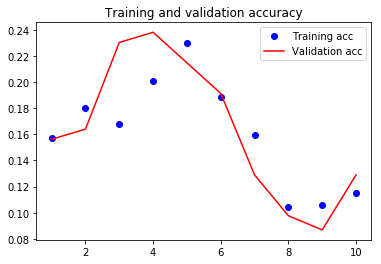

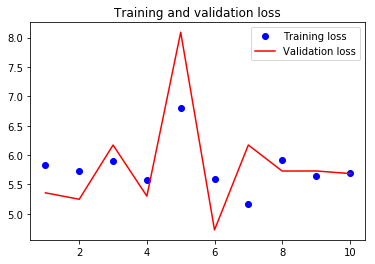

Epochs: 50 | Learning rate: 0.001


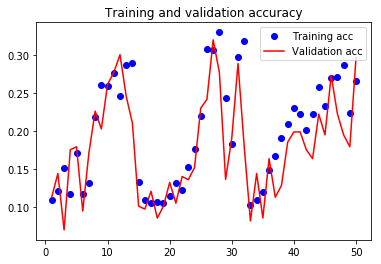

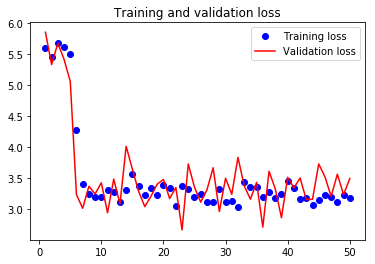

Epochs: 100 | Learning rate: 0.001


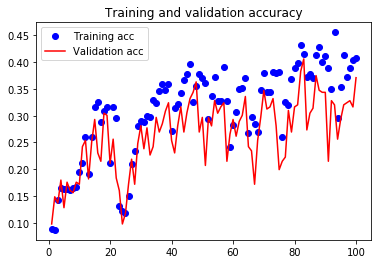

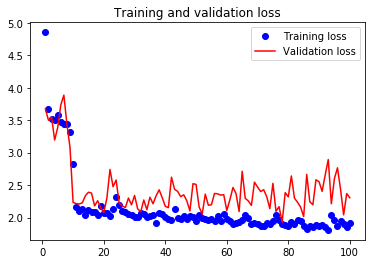

Epochs: 10 | Learning rate: 0.01


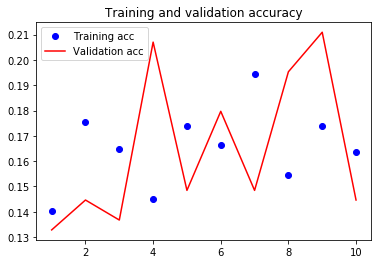

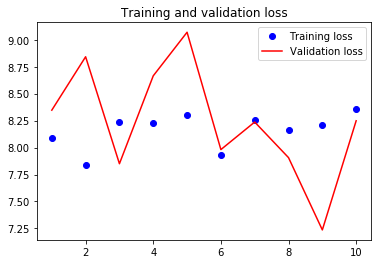

Epochs: 50 | Learning rate: 0.01


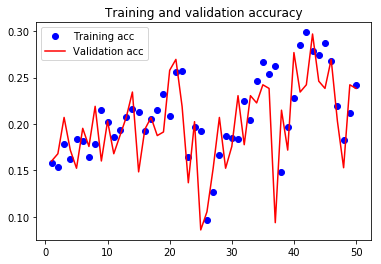

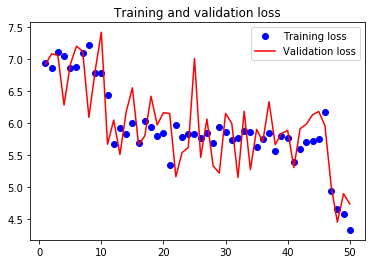

Epochs: 100 | Learning rate: 0.01


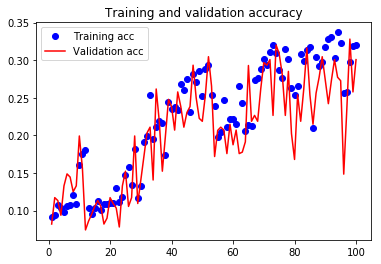

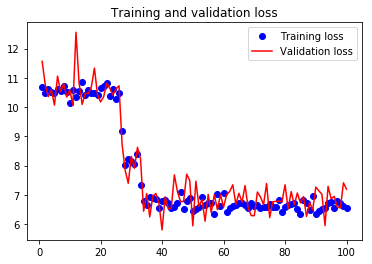

Epochs: 10 | Learning rate: 0.1


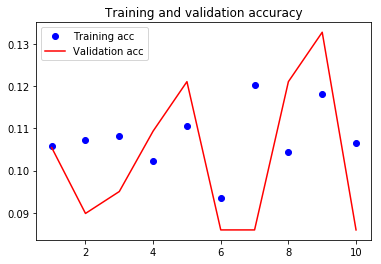

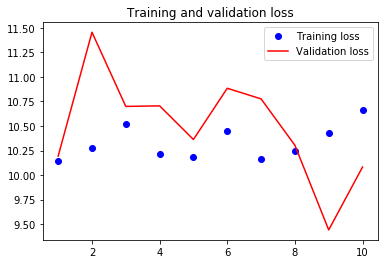

Epochs: 50 | Learning rate: 0.1


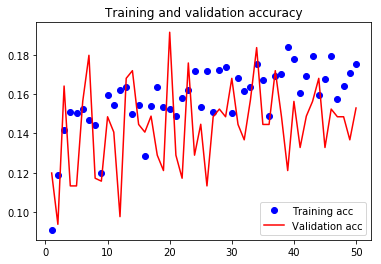

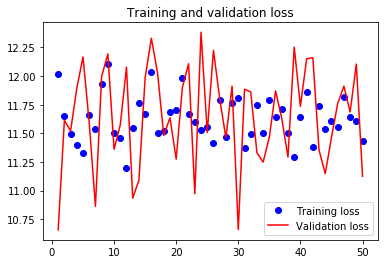

Epochs: 100 | Learning rate: 0.1


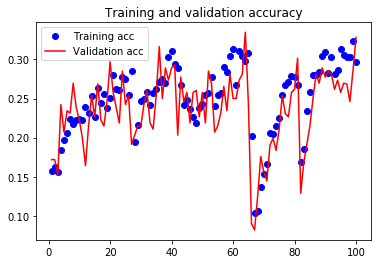

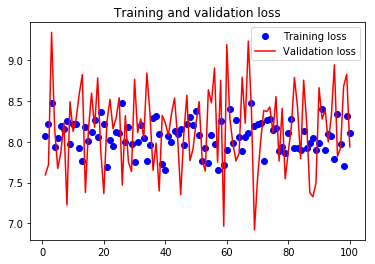

In [18]:
for i in history_set:
    plotar(history_set[i],i[0],i[1])